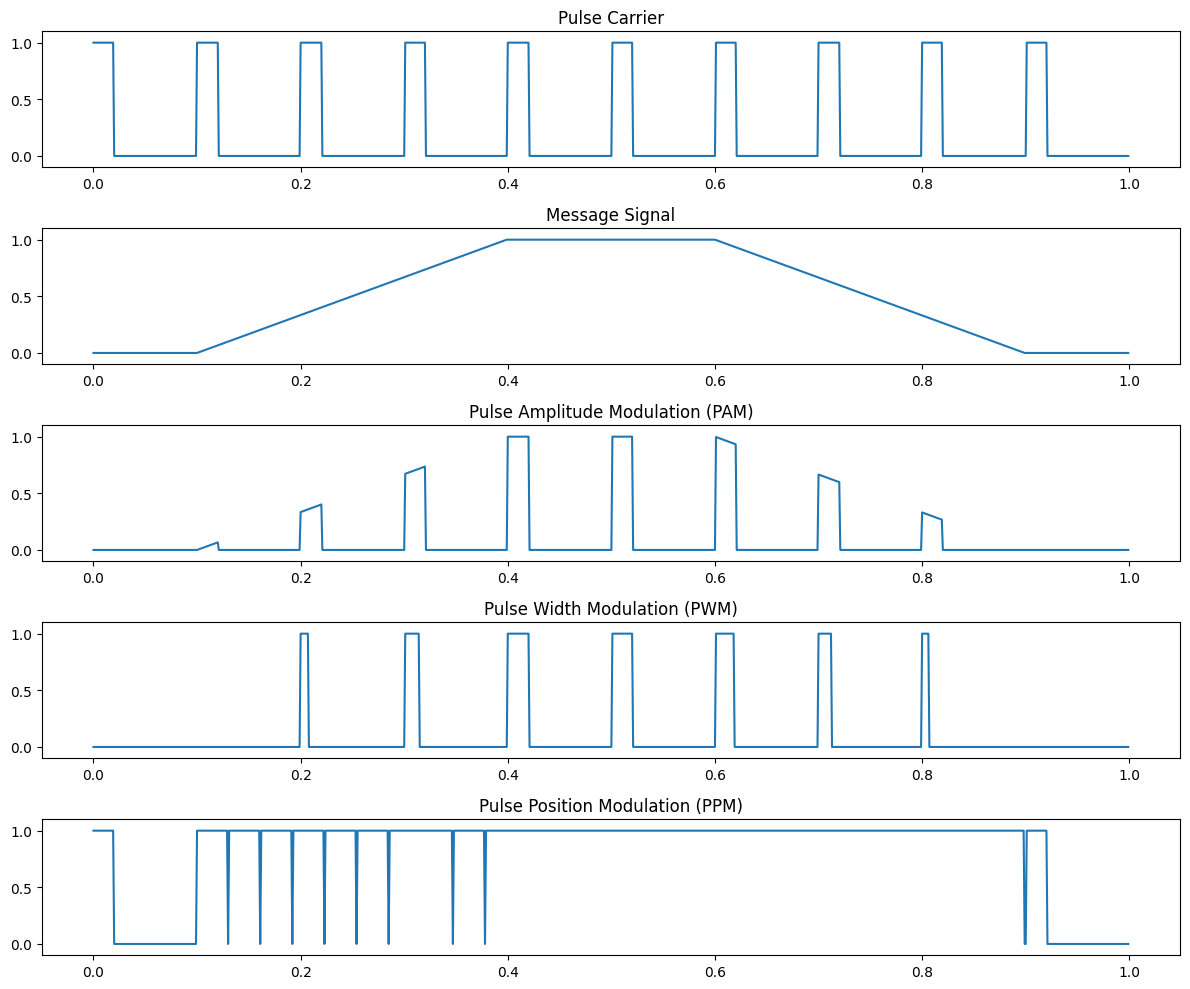

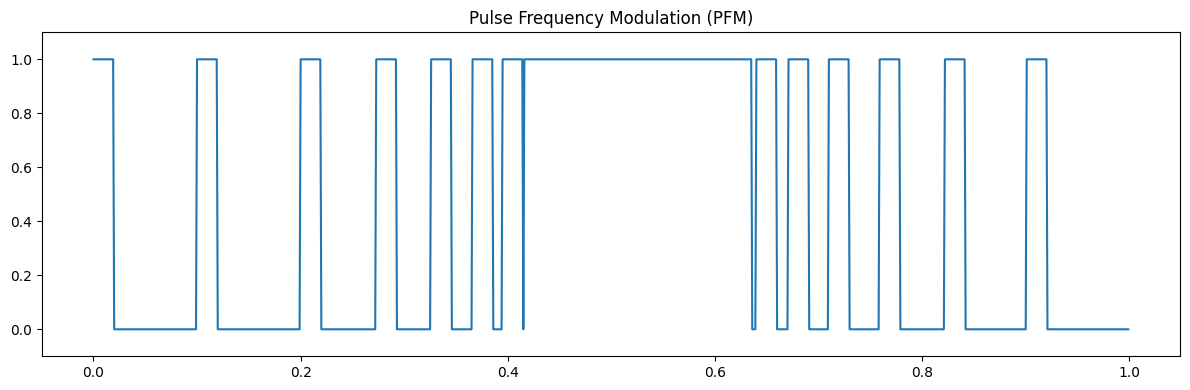

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector (1 second duration)
fc = 10  # Carrier frequency (number of pulses per second)
pulse_width = 0.02  # Width of each pulse (fixed for the carrier)

# Pulse Carrier: Evenly spaced vertical pulses of equal height and width
pulse_carrier = np.zeros_like(t)
for i in range(len(t)):
    if (t[i] % (1 / fc)) < pulse_width:
        pulse_carrier[i] = 1  # Create pulses of height 1

# Message Signal: Ramp-like rise, hold, and fall
message_signal = np.zeros_like(t)
rise_start, rise_end = 0.1, 0.4  # Time range for the rise
hold_start, hold_end = 0.4, 0.6  # Time range for holding at peak
fall_start, fall_end = 0.6, 0.9  # Time range for the fall

# Create the ramp-like rise
message_signal[(t >= rise_start) & (t < rise_end)] = np.linspace(0, 1, len(t[(t >= rise_start) & (t < rise_end)]))
# Hold at the peak
message_signal[(t >= hold_start) & (t < hold_end)] = 1
# Create the ramp-like fall
message_signal[(t >= fall_start) & (t < fall_end)] = np.linspace(1, 0, len(t[(t >= fall_start) & (t < fall_end)]))

# Pulse Amplitude Modulation (PAM)
pam_signal = pulse_carrier * message_signal

# Pulse Width Modulation (PWM)
pwm_signal = np.zeros_like(t)
for i in range(len(t)):
    if (t[i] % (1 / fc)) < (pulse_width * message_signal[i]):
        pwm_signal[i] = 1  # Pulse width varies with message signal

# Pulse Position Modulation (PPM)
ppm_signal = np.zeros_like(t)
shift_factor = 0.1  # Controls how much the pulses shift
for i in range(len(t)):
    pulse_time = t[i] % (1 / fc)
    if pulse_time < pulse_width:
        ppm_signal[i] = 1
    # Shift pulses based on message signal
    if message_signal[i] > 0:
        ppm_shift = int(shift_factor * message_signal[i] * fs / fc)
        if i + ppm_shift < len(t):
            ppm_signal[i + ppm_shift] = 1

# Pulse Frequency Modulation (PFM)
pfm_signal = np.zeros_like(t)
current_time = 0
while current_time < t[-1]:
    pulse_spacing = (1 / fc) * (1 - 0.8 * message_signal[int(current_time * fs)])  # Adjust spacing based on message
    pulse_start = int(current_time * fs)
    pulse_end = int((current_time + pulse_width) * fs)
    if pulse_end < len(t):
        pfm_signal[pulse_start:pulse_end] = 1
    current_time += pulse_spacing

# Plotting
plt.figure(figsize=(12, 10))

# Pulse Carrier
plt.subplot(5, 1, 1)
plt.plot(t, pulse_carrier)
plt.title('Pulse Carrier')
plt.ylim(-0.1, 1.1)

# Message Signal
plt.subplot(5, 1, 2)
plt.plot(t, message_signal)
plt.title('Message Signal')
plt.ylim(-0.1, 1.1)

# PAM
plt.subplot(5, 1, 3)
plt.plot(t, pam_signal)
plt.title('Pulse Amplitude Modulation (PAM)')
plt.ylim(-0.1, 1.1)

# PWM
plt.subplot(5, 1, 4)
plt.plot(t, pwm_signal)
plt.title('Pulse Width Modulation (PWM)')
plt.ylim(-0.1, 1.1)

# PPM
plt.subplot(5, 1, 5)
plt.plot(t, ppm_signal)
plt.title('Pulse Position Modulation (PPM)')
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# PFM (plot separately due to different nature)
plt.figure(figsize=(12, 4))
plt.plot(t, pfm_signal)
plt.title('Pulse Frequency Modulation (PFM)')
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()